In [1]:
# Stock Profit and Loss

[*********************100%%**********************]  1 of 1 completed


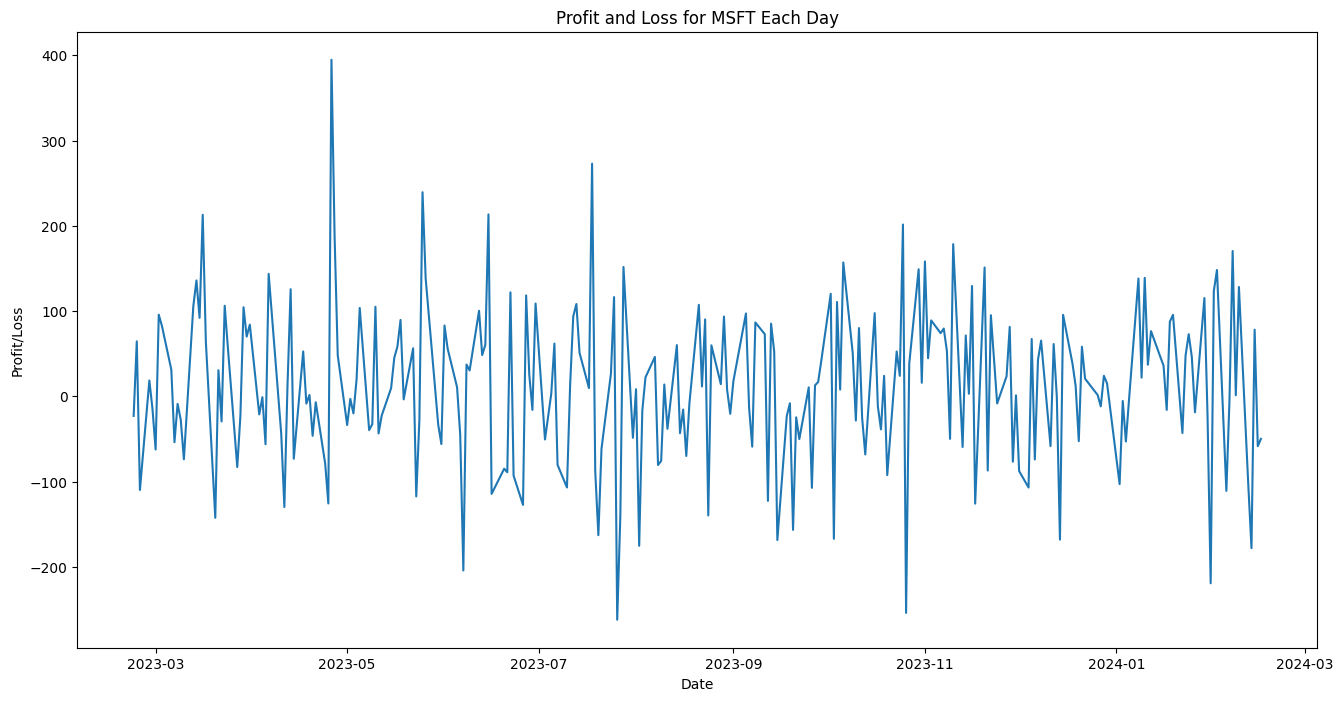

Financial Analysis for MSFT
--------------------------------------------------
Profit or Loss: $3061.43
Percentage Gain or Loss: 37.98%
Percentage of Returns: 61.23%
Net Gains or Losses: 61.23%
Total Returns: 61.23%


In [3]:
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt

def calculate_stock_profit_loss(symbol, start_date, end_date, initial_investment):
    # Download stock data
    dataset = yf.download(symbol, start_date, end_date)

    # Calculate the number of shares and investment values
    shares = initial_investment / dataset['Adj Close'][0]
    purchase_price = dataset['Adj Close'][0]
    current_value = shares * dataset['Adj Close'][-1]

    # Calculate profit or loss and related metrics
    profit_or_loss = current_value - initial_investment
    percentage_gain_or_loss = (profit_or_loss / current_value) * 100
    percentage_returns = (current_value - initial_investment) / initial_investment * 100
    net_gains_or_losses = (dataset['Adj Close'][-1] - dataset['Adj Close'][0]) / dataset['Adj Close'][0] * 100
    total_return = ((current_value / initial_investment) - 1) * 100

    # Calculate profit and loss for each day
    dataset['PnL'] = shares * (dataset['Adj Close'].diff())

    # Visualize the profit and loss
    plt.figure(figsize=(16,8))
    plt.plot(dataset['PnL'])
    plt.title(f'Profit and Loss for {symbol} Each Day')
    plt.xlabel('Date')
    plt.ylabel('Profit/Loss')
    plt.show()

    # Display financial analysis
    print(f"Financial Analysis for {symbol}")
    print('-' * 50)
    print(f"Profit or Loss: ${profit_or_loss:.2f}")
    print(f"Percentage Gain or Loss: {percentage_gain_or_loss:.2f}%")
    print(f"Percentage of Returns: {percentage_returns:.2f}%")
    print(f"Net Gains or Losses: {net_gains_or_losses:.2f}%")
    print(f"Total Returns: {total_return:.2f}%")

# Main execution
if __name__ == "__main__":
    symbol = 'MSFT'
    start_date = dt.date.today() - dt.timedelta(days=365)
    end_date = dt.date.today()
    initial_investment = 5000

    calculate_stock_profit_loss(symbol, start_date, end_date, initial_investment)